<a href="https://colab.research.google.com/drive/1mfw3pjLfiWEb_zO4x0XR6mnJPc_XnY7c?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Clasificación de imagenes </h1>**

##Conectar al drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/sportimages

americano  basket


##Uso de librerias

In [ ]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
import tensorflow as tf
from keras.utils import to_categorical
import keras
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

##Visualización de los datos



In [ ]:
imgpath = "/content/drive/MyDrive/sportimages"
images = []
directories = []
dircount = []
prevRoot=''
cant=0
print("leyendo imagenes de ",imgpath)



leyendo imagenes de  /content/drive/MyDrive/sportimages


In [ ]:
for root, dirnames, filenames in os.walk(imgpath):
  for filename in filenames:
    if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
      cant=cant+1
      filepath = os.path.join(root, filename)
      image = plt.imread(filepath)
      images.append(image)
      b = "Leyendo..." + str(cant)
      print (b, end="\r")
      if prevRoot !=root:
          print(root, cant)
          prevRoot=root
          directories.append(root)
          dircount.append(cant)
          cant=0


dircount.append(cant)
dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-3513952285.py:3: SyntaxWarning: invalid escape sequence '\.'
  if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):


/content/drive/MyDrive/sportimages/americano 1
/content/drive/MyDrive/sportimages/basket 15
Directorios leidos: 2
Imagenes en cada directorio [16, 8]
suma Total de imagenes en subdirs: 24


In [ ]:
label =[]
indice = 0
for cantidad in dircount:
  for i in range(cantidad):
    label.append(indice)
  indice = indice + 1
print("Cantidad de labels",len(label))

Cantidad de labels 24


In [ ]:
deportes = []
indice = 0
for directorio in directories:
  name = directorio.split('/')
  print(indice, name[len(name)-1])
  deportes.append(name[len(name)-1])
  indice = indice +1

0 americano
1 basket


##Preparación para el modelo

In [ ]:
y = np.array(label)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy
print(X.shape)
print(y.shape)

(24, 128, 128, 3)
(24,)


In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Total number of outputs :  2
Output classes :  [0 1]


In [ ]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)


Training data shape :  (19, 128, 128, 3) (19,)
Testing data shape :  (5, 128, 128, 3) (5,)


Text(0.5, 1.0, 'Ground Truth : 1')

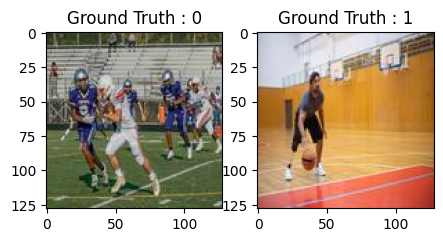

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

##Generar el modelo


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LeakyReLU

train_X_ = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 127.
test_X = test_X / 127.

In [ ]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [ ]:
# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])


Original label: 0
After conversion to one-hot: [1. 0.]


In [ ]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [ ]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-4 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 6 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 4 # cantidad de imágenes que se toman a la vez en memoria

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(128, 128, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(32, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))

model.add(Dense(2, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     4,194,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,195,298 (16.00 MB)

 Trainable params: 4,195,298 (16.00 MB)

 Non-trainable params: 0 (0.00 B)

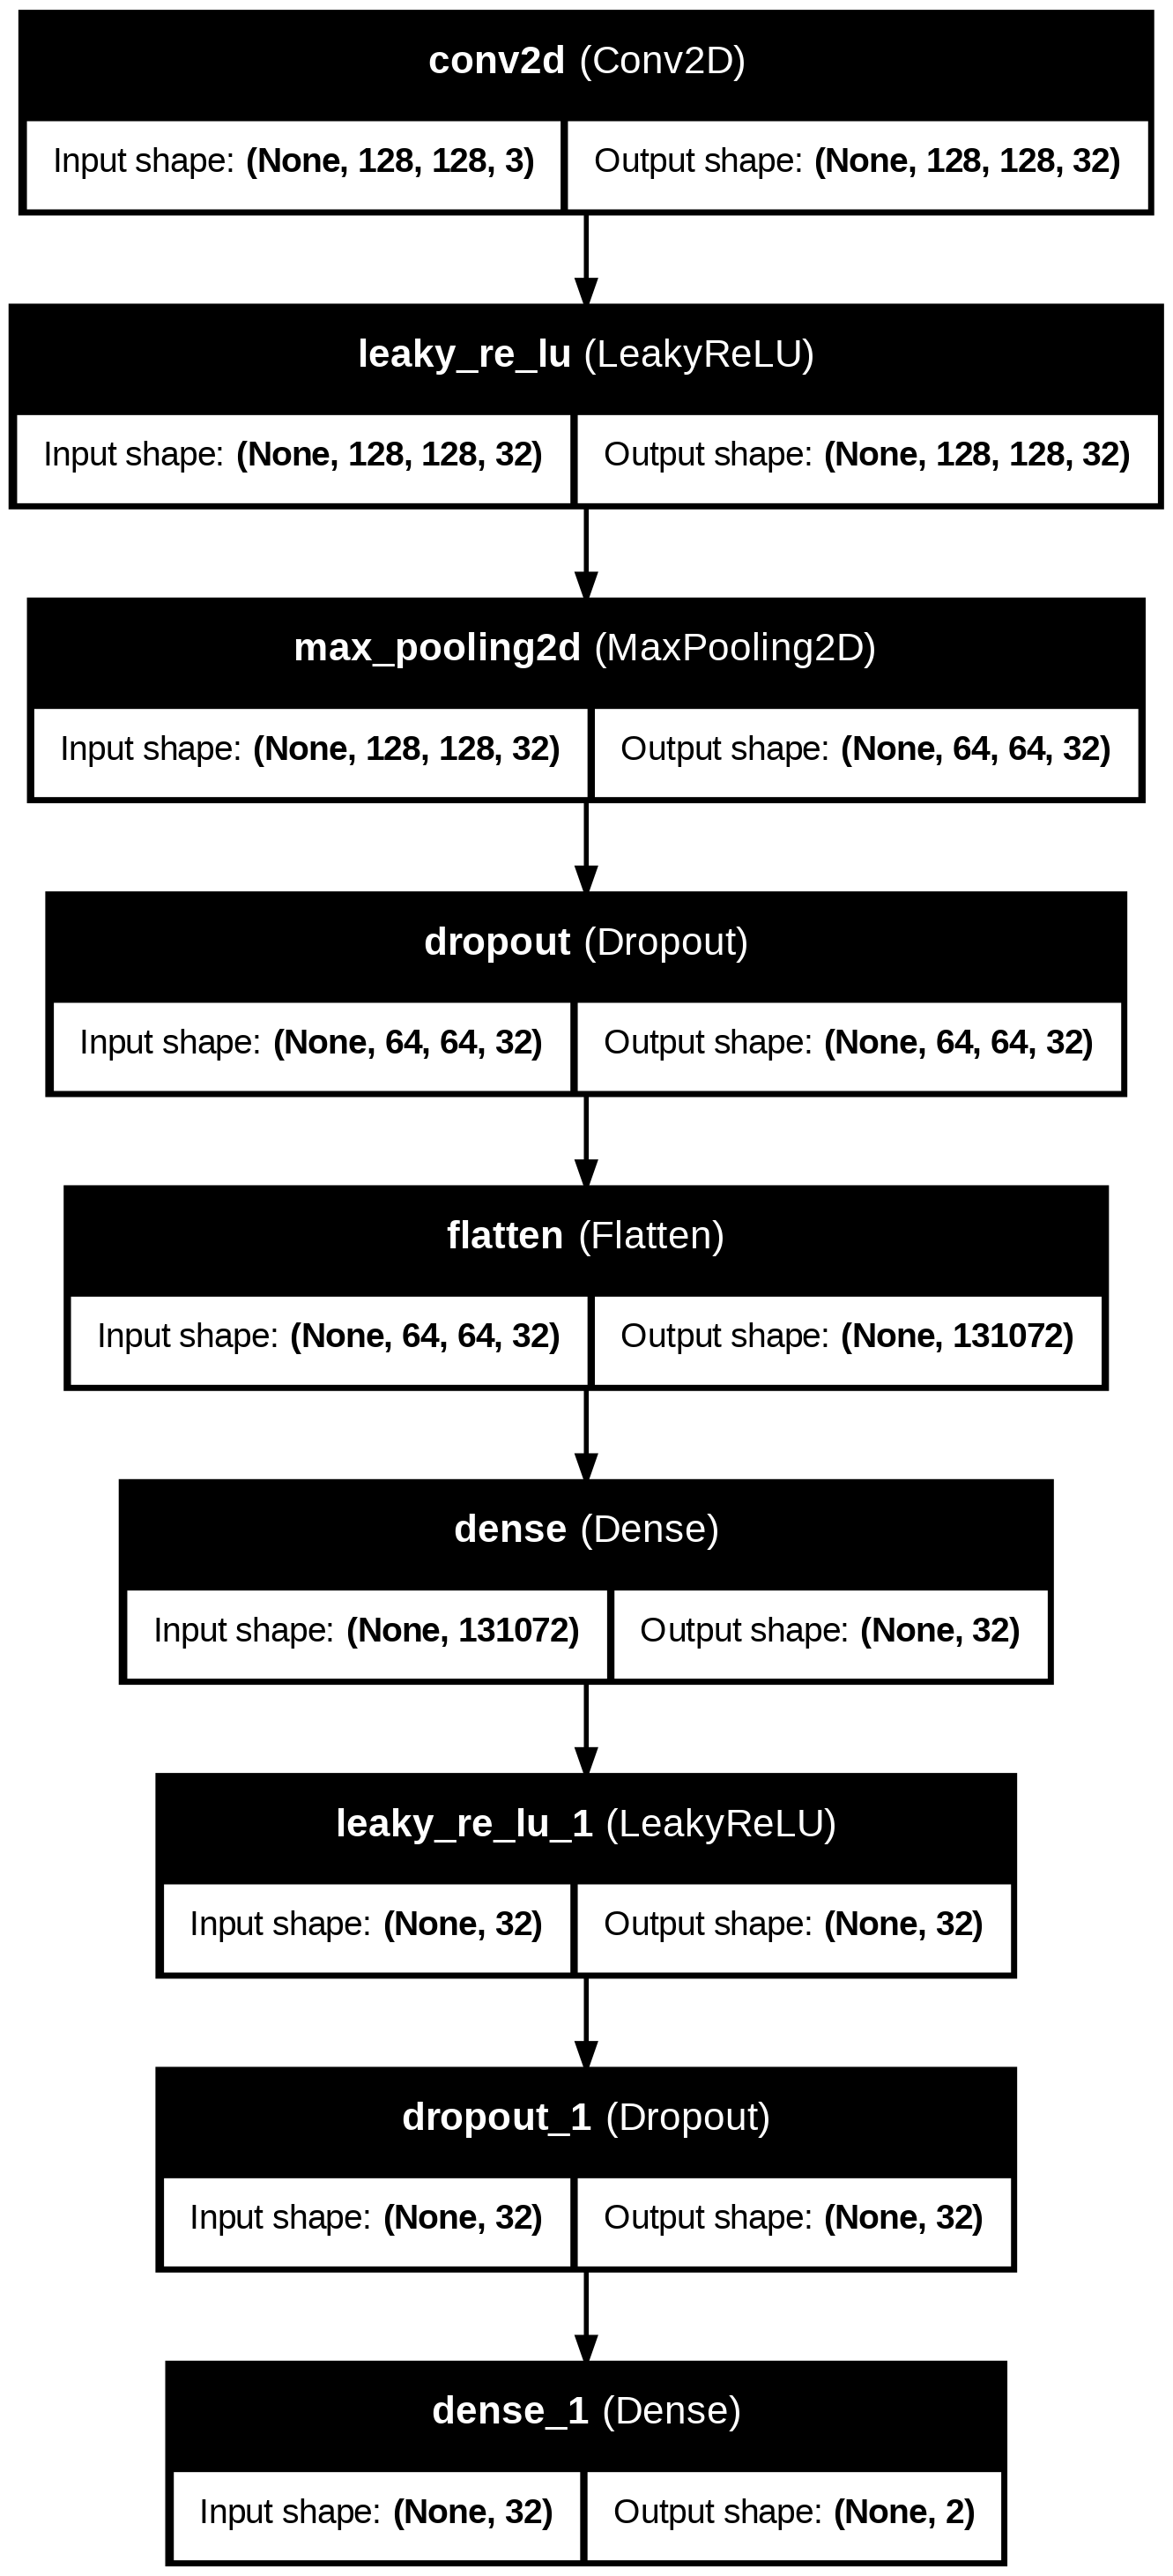

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adagrad(learning_rate=INIT_LR),
    metrics=['accuracy'])

In [ ]:
sport_train = model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(valid_X, valid_label))

Epoch 1/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8633 - loss: 0.3150 - val_accuracy: 0.7500 - val_loss: 0.5905
Epoch 2/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9050 - loss: 0.3630 - val_accuracy: 0.7500 - val_loss: 0.5897
Epoch 3/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.2678 - val_accuracy: 0.7500 - val_loss: 0.5966
Epoch 4/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8117 - loss: 0.3246 - val_accuracy: 0.7500 - val_loss: 0.6091
Epoch 5/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9733 - loss: 0.2685 - val_accuracy: 0.7500 - val_loss: 0.5979
Epoch 6/6
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9317 - loss: 0.2488 - val_accuracy: 0.7500 - val_loss: 0.6074


In [ ]:
model.save('model.h5')

In [ ]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2, random_state=13)
train_X_ = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 127.
test_X = test_X / 127.
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.2295
Test loss: 0.2294560968875885
Test accuracy: 1.0


##Modelo predictivo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Image: /content/drive/MyDrive/sportimages/basket/pexels-img_1979-stevonka-379280-3425993.jpg
Predicted class (numerical): 1
Predicted class (sport name): basket


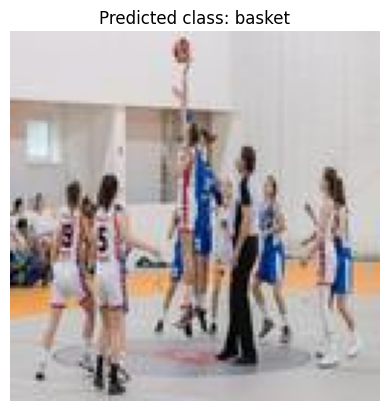

In [ ]:
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

uploaded = files.upload()

images=[]
filenames = []
for fn in uploaded.keys():
  filenames.append(fn)

for filepath in filenames:
  image = plt.imread(filepath) # Removed ,0 as it's not needed for color images
  image_resized= resize(image, (128,128,3))
  images.append(image_resized)

X= np.array(images) # Removed dtype=np.uint8 as resize outputs float64
test_X = X.astype('float32') # Changed to float32
test_X = test_X/127. # Changed to 127.
predicted_classes = model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

# Print the numerical prediction and the sport name for each image
for i, prediction in enumerate(predicted_classes):
  print(f"Image: {filenames[i]}")
  print(f"Predicted class (numerical): {prediction}")
  print(f"Predicted class (sport name): {deportes[prediction]}")

  # Display the image and the predicted class
  plt.imshow(images[i])
  plt.title(f"Predicted class: {deportes[prediction]}")
  plt.axis('off')
  plt.show()